<a href="https://colab.research.google.com/github/nachomendoza97/Data-Industrial/blob/main/Proyecto5_Mantenimiento_Predictivo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

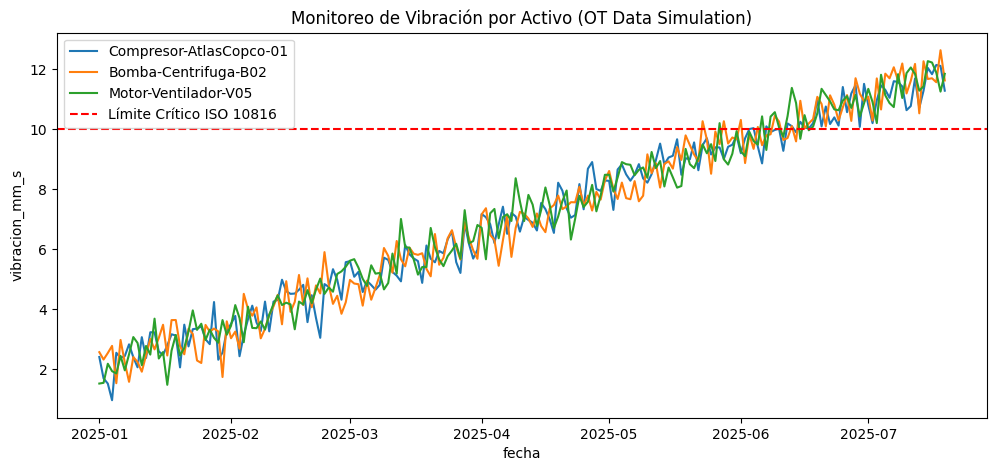

--- PREDICCIÓN PARA HOY (06/01/2026) ---
Días estimados para falla del Compresor: 231 días.


In [2]:
## Utilizacion de regresion lineal para encontrar pendiente de degradacion de un activo y estimar el tiempo en cuando se encontrara la falla

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from datetime import datetime, timedelta

# 1. SIMULACIÓN DE ACTIVOS INDUSTRIALES
n_registros = 200
maquinas = ['Compresor-AtlasCopco-01', 'Bomba-Centrifuga-B02', 'Motor-Ventilador-V05']

data_list = []
for m in maquinas:
    start_date = datetime(2025, 1, 1)
    for i in range(n_registros):
        # La vibración y temperatura aumentan con el tiempo (degradación)
        vibracion = np.random.normal(2.0 + (i * 0.05), 0.5)
        temperatura = np.random.normal(60 + (i * 0.1), 2)

        # Vida útil real simulada (va bajando hasta 0)
        rul_real = max(0, 365 - i)

        data_list.append({
            'fecha': start_date + timedelta(days=i),
            'asset_id': m,
            'vibracion_mm_s': vibracion,
            'temp_c': temperatura,
            'RUL_dias_real': rul_real
        })

df_pdm = pd.DataFrame(data_list)

# 2. MODELADO: PREDICCIÓN DE FALLA
# Entrenamos con una máquina para predecir en otra (Transfer Learning básico)
entrenamiento = df_pdm[df_pdm['asset_id'] == 'Compresor-AtlasCopco-01']
X = entrenamiento[['vibracion_mm_s', 'temp_c']]
y = entrenamiento['RUL_dias_real']

modelo = LinearRegression()
modelo.fit(X, y)

# 3. VISUALIZACIÓN DE SALUD DEL EQUIPO
plt.figure(figsize=(12, 5))
sns.lineplot(data=df_pdm, x='fecha', y='vibracion_mm_s', hue='asset_id')
plt.axhline(y=10, color='r', linestyle='--', label='Límite Crítico ISO 10816')
plt.title('Monitoreo de Vibración por Activo (OT Data Simulation)')
plt.legend()
plt.show()

print(f"--- PREDICCIÓN PARA HOY ({datetime.now().strftime('%d/%m/%Y')}) ---")
# Simulamos lectura actual del Compresor
lectura_actual = pd.DataFrame([[8.5, 75]], columns=['vibracion_mm_s', 'temp_c'])
pred = modelo.predict(lectura_actual)
print(f"Días estimados para falla del Compresor: {int(pred[0])} días.")